<a href="https://colab.research.google.com/github/kurkur19/Intelligent_Data_Analysis_Al_Khmuz_BS_25/blob/main/%D0%9A%D0%9F_%E2%84%963_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%91%D0%A1_25_%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%86%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 3: Кластерний аналіз методом КРАБ
### Дисципліна: Вступ до Інтелектуального Аналізу Даних



Аль Хмуз Карина Бассамівна БС-25

##Завдання:

1.	Реалізувати алгоритм та застосувати його до даних з КП2. Розділення кластерів проводити по найдовшому ребру.
2.	Вивести таблицю з кроками об'єднання (див. приклад).
3.	Оцінити якість кластеризації за критерієм F. Вивести значення всіх чотирьох характеристик.
4.	Зробити висновок.


##Вхідні дані:
Я, Аль Хмуз Карина Бассамівна, маю перший варіант в своїй групі БС-25, тому:

1.	Вибір даних для кластеризації– 30 значень
2.	 Початок даних: 36
3.	Кінець даних: 65

##Вимоги:
1.	Теоретичні дані
2.	Етапи виконання
3.	Результат роботи програми
4.	Висновки про оптимальну кількість кластерів


##Теоретичний матеріал:


Сімейство алгоритмів КРАБ (кластеризація на основі розподілу) працює, створюючи незамкнутий зв'язний граф, що дає змогу ділити множину об'єктів на групи. Це робить алгоритми дуже гнучкими для класифікації даних різної форми та розміру і підходить для різних типів даних.

Основна ціль кластеризації — згрупувати об'єкти так, щоб об'єкти всередині одного класу були максимально схожими, а об'єкти з різних класів — максимально відрізнялися. Для досягнення цього використовуються такі ключові поняття:
- **Міра близькості (ρ)**: показує, наскільки близько розташовані об'єкти в межах одного класу. Чим менша відстань між точками одного класу, тим більше шансів, що вони правильно згруповані.
- **Міра віддаленості (d)**: визначає, наскільки далеко класи розташовані один від одного. Велика віддаленість свідчить про гарне розділення між класами.
- **Рівномірність розподілу (h)**: відображає бажання мати приблизно рівномірний розподіл об'єктів між класами, що допомагає підтримувати баланс і покращує подальший аналіз.
- **Зміна щільності (λ)**: показує, як щільно розташовані об'єкти в різних частинах простору, що дозволяє врахувати неоднорідність розподілу даних.

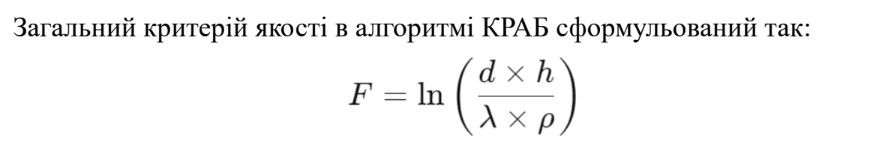

##Практична частина:

###Імпорт бібліотек

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from google.colab import files
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import cdist  # Використовуємо для обчислення відстаней


###Крок №1: Підготовка даних


Завантаження файлу Excel

In [8]:
uploaded = files.upload()
file_path = 'prostate.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

Saving prostate.xlsx to prostate (2).xlsx


Вибір змінних та діапазону рядків

In [62]:
data_in_range = data[['rx', 'sbp', 'sg']].iloc[36:66].reset_index(drop=True)


Закодування текстових значень у стовпці 'rx' за допомогою Label Encoding

In [63]:
label_encoder = LabelEncoder()
data_in_range['rx'] = label_encoder.fit_transform(data_in_range['rx'])

Заповнення NaN значень середнім значенням у кожному стовпці

In [64]:
data_in_range.fillna(data_in_range.mean(), inplace=True)
print(f"Початкові дані:\n{data_in_range}")

Початкові дані:
    rx  sbp         sg
0    3   16  11.000000
1    0   12  13.000000
2    0   12  13.000000
3    1   14  11.000000
4    3   17  12.000000
5    1   15  13.000000
6    2   14  13.000000
7    3   16  15.000000
8    1   13  13.000000
9    2   17  11.000000
10   0   12  13.000000
11   2   12   9.000000
12   2   13   8.000000
13   3   11  11.000000
14   3   16  11.000000
15   2   17   8.000000
16   0   12   8.000000
17   1   16   9.000000
18   3   18   9.000000
19   0   15  11.000000
20   1   13  11.344828
21   0   13  11.000000
22   0   16   9.000000
23   3   12   9.000000
24   1   14  13.000000
25   3   21  13.000000
26   0   14  15.000000
27   3   12  11.000000
28   0   14  11.000000
29   2   13  15.000000


###Крок №2: Нормалізація даних

In [65]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_in_range)
dist_matrix = cdist(normalized_data, normalized_data)  # Обчислення матриці відстаней
print(f"\nНормалізовані дані:\n{normalized_data}")


Нормалізовані дані:
[[ 1.24568220e+00  7.38817656e-01 -1.69234054e-01]
 [-1.24568220e+00 -1.03434472e+00  8.12323458e-01]
 [-1.24568220e+00 -1.03434472e+00  8.12323458e-01]
 [-4.15227399e-01 -1.47763531e-01 -1.69234054e-01]
 [ 1.24568220e+00  1.18210825e+00  3.21544702e-01]
 [-4.15227399e-01  2.95527062e-01  8.12323458e-01]
 [ 4.15227399e-01 -1.47763531e-01  8.12323458e-01]
 [ 1.24568220e+00  7.38817656e-01  1.79388097e+00]
 [-4.15227399e-01 -5.91054125e-01  8.12323458e-01]
 [ 4.15227399e-01  1.18210825e+00 -1.69234054e-01]
 [-1.24568220e+00 -1.03434472e+00  8.12323458e-01]
 [ 4.15227399e-01 -1.03434472e+00 -1.15079157e+00]
 [ 4.15227399e-01 -5.91054125e-01 -1.64157032e+00]
 [ 1.24568220e+00 -1.47763531e+00 -1.69234054e-01]
 [ 1.24568220e+00  7.38817656e-01 -1.69234054e-01]
 [ 4.15227399e-01  1.18210825e+00 -1.64157032e+00]
 [-1.24568220e+00 -1.03434472e+00 -1.64157032e+00]
 [-4.15227399e-01  7.38817656e-01 -1.15079157e+00]
 [ 1.24568220e+00  1.62539884e+00 -1.15079157e+00]
 [-1.24568

###Крок №3: Побудова послідовності об'єктів та відстаней між ними

In [66]:
def build_distance_sequence(dist_matrix):
    visited = set()
    sequence = []
    current_object = 0
    visited.add(current_object)

    while len(visited) < len(dist_matrix):
        distances = [(dist_matrix[current_object, i], i) for i in range(len(dist_matrix)) if i not in visited]
        min_distance, next_object = min(distances, key=lambda x: x[0])
        sequence.append((current_object, next_object, min_distance))  # Без +1 для зручності доступу
        visited.add(next_object)
        current_object = next_object

    return sequence

sequence = build_distance_sequence(dist_matrix)
print("\n\n{:<10} {:<10} {:<20}".format('Об\'єкт 1', 'Об\'єкт 2', 'Відстань'))

for obj1, obj2, dist in sequence:
    print(f"{obj1:<10} {obj2:<10} {dist:.10f}")



Об'єкт 1   Об'єкт 2   Відстань            
0          14         0.0000000000
14         4          0.6613398049
4          9          0.9646341067
9          17         1.3600062030
17         22         0.8304547985
22         19         1.0770151808
19         28         0.4432905934
28         21         0.4432905934
21         20         0.8475230601
20         3          0.4744962752
3          24         0.9815575121
24         5          0.4432905934
5          8          0.8865811868
8          1          0.9413616322
1          2          0.0000000000
2          10         0.0000000000
10         26         1.3226796099
26         29         1.7190483530
29         6          1.0770151808
6          7          1.5617735184
7          25         2.4240707302
25         18         2.3711557414
18         15         1.0616145770
15         12         1.7731623737
12         11         0.6613398049
11         23         0.8304547985
23         27         0.9815575121
27        

Можемо побачити таку ситуацію, коли відстань між двома об'єктами дорівнює нулю (тобто 0 - 14 з відстанню 0.0000000000), вона може виникнути через таку причину, як:

Обидва об'єкти є однаковими: Якщо два об'єкти мають ідентичні значення за всіма ознаками після нормалізації, відстань між ними буде дорівнювати нулю.
Або ми допустили помилку при обрахунках...

###Крок №4: Розбиття по найдовшому ребру

In [67]:
longest_edge = max(sequence, key=lambda x: x[2])
print(f"\nНайдовше ребро: {longest_edge[0]+1} - {longest_edge[1]+1} з відстанню {longest_edge[2]:.10f}")
sequence.remove(longest_edge)

# Формування двох кластерів
cluster_1, cluster_2 = set(), set()
cluster_1.add(longest_edge[0])
cluster_2.add(longest_edge[1])

# Додавання об'єктів до кластерів на основі видаленого ребра
for obj1, obj2, dist in sequence:
    if obj1 in cluster_1:
        cluster_1.add(obj2)
    elif obj1 in cluster_2:
        cluster_2.add(obj2)
    elif obj2 in cluster_1:
        cluster_1.add(obj1)
    else:
        cluster_2.add(obj1)

print(f"\nКластер 1: {sorted(cluster_1)}")
print(f"Кластер 2: {sorted(cluster_2)}")


Найдовше ребро: 14 - 17 з відстанню 2.9276572867

Кластер 1: [13, 27]
Кластер 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29]



Результат кластеризації показав:

Найдовше ребро (відстань 2.93) між об'єктами 14(13) та 17(16) стало ключовим у розділенні даних на два кластери.

Кластер 1: Містить два об'єкти [13, 27], які віддалені від основної групи, можливо, є аномаліями.

Кластер 2: Основна частина даних (28 об'єктів), що показує вищу згуртованість та схожість.

###Крок №5: Обчислення критерію F

In [68]:
def calculate_metrics(sequence, cluster_1, cluster_2):
    # Обчислення середніх відстаней для кластерів
    rho_1 = sum(dist for obj1, obj2, dist in sequence if obj1 in cluster_1 and obj2 in cluster_1) / len(cluster_1)
    rho_2 = sum(dist for obj1, obj2, dist in sequence if obj1 in cluster_2 and obj2 in cluster_2) / len(cluster_2)
    rho_total = rho_1 + rho_2

    # Обчислення міжкластерної відстані
    d_intercluster = sum(dist for obj1, obj2, dist in sequence if
                         (obj1 in cluster_1 and obj2 in cluster_2) or (obj1 in cluster_2 and obj2 in cluster_1)) / len(sequence)

    h = abs(len(cluster_1) - len(cluster_2)) / (len(cluster_1) + len(cluster_2))

    # Обчислення локальної неоднорідності
    lambda_values = []
    for obj1, obj2, dist in sequence:
        if (obj1 in cluster_1 and obj2 in cluster_1) or (obj1 in cluster_2 and obj2 in cluster_2):
            min_adjacent_edge = min(
                (d for o1, o2, d in sequence if (o1 == obj1 or o2 == obj1 or o1 == obj2 or o2 == obj2) and d != dist),
                default=dist)
            lambda_values.append(min_adjacent_edge / dist if dist != 0 else 0)
    lambda_total = np.mean(lambda_values) if lambda_values else 0

    return rho_total, d_intercluster, h, lambda_total

rho, d, h, lambda_val = calculate_metrics(sequence, cluster_1, cluster_2)
F = np.log(((d * h) / (lambda_val * rho))) if lambda_val and rho else 0
print(f"\nКритерій якості кластеризації (F): {F:.10f}")
print(f"Міра близькості (rho): {rho:.10f}")
print(f"Відстань між класами (d): {d:.10f}")
print(f"Рівномірність розподілу (h): {h:.10f}")
print(f"Міра локальної неоднорідності (lambda): {lambda_val:.10f}")





Критерій якості кластеризації (F): -3.4371679831
Міра близькості (rho): 1.1201151620
Відстань між класами (d): 0.0350556254
Рівномірність розподілу (h): 0.8666666667
Міра локальної неоднорідності (lambda): 0.8435099805


##Аналіз критеріїв якості кластеризації:

***Критерій якості кластеризації (F):*** Негативне значення -3.44 вказує на низьку якість кластеризації. Це означає, що обрані кластери недостатньо добре відокремлені один від одного.

***Міра близькості (rho):*** Значення 1.12 вказує на певний рівень близькості між об'єктами всередині кластерів. Проте для хорошого кластеру зазвичай очікується ще менше значення, що вказувало б на більш тісну згуртованість об'єктів.

***Відстань між класами (d):*** Низьке значення 0.035 свідчить про те, що кластери дуже близько розташовані один до одного, що може ускладнювати їх чітке розмежування.

***Рівномірність розподілу (h):*** Високе значення 0.87 показує значний дисбаланс між кластерами (один кластер набагато більший за інший). Це впливає на ефективність кластеризації.

***Міра локальної неоднорідності (lambda):*** Значення 0.84 говорить про помірну неоднорідність всередині кластерів. Це свідчить, що в кластерах можуть бути внутрішні відмінності, що знижує їх цілісність.